<a href="https://colab.research.google.com/github/miu0001/Statistical_Inference/blob/master/Regression_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression Analysis

## Dataset (8 Observations)
Let's analyze the relationship between study hours (X) and exam scores (Y):

| Observation | Study Hours (X) | Exam Score (Y) |
|-------------|-----------------|----------------|
| 1           | 2               | 65             |
| 2           | 4               | 70             |
| 3           | 6               | 75             |
| 4           | 8               | 80             |
| 5           | 10              | 85             |
| 6           | 12              | 90             |
| 7           | 14              | 88             |
| 8           | 16              | 95             |

## Step 1: Basic Calculations

### Summary Statistics
- n = 8 observations
- Σx = 2 + 4 + 6 + 8 + 10 + 12 + 14 + 16 = 72
- Σy = 65 + 70 + 75 + 80 + 85 + 90 + 88 + 95 = 648
- x̄ = 72/8 = 9
- ȳ = 648/8 = 81

### Detailed Calculations Table
| X | Y | x-x̄ | y-ȳ | (x-x̄)² | (y-ȳ)² | (x-x̄)(y-ȳ) | x² | y² | xy |
|---|---|-----|-----|---------|---------|-------------|----|----|-----|
| 2 | 65 | -7 | -16 | 49 | 256 | 112 | 4 | 4225 | 130 |
| 4 | 70 | -5 | -11 | 25 | 121 | 55 | 16 | 4900 | 280 |
| 6 | 75 | -3 | -6 | 9 | 36 | 18 | 36 | 5625 | 450 |
| 8 | 80 | -1 | -1 | 1 | 1 | 1 | 64 | 6400 | 640 |
| 10 | 85 | 1 | 4 | 1 | 16 | 4 | 100 | 7225 | 850 |
| 12 | 90 | 3 | 9 | 9 | 81 | 27 | 144 | 8100 | 1080 |
| 14 | 88 | 5 | 7 | 25 | 49 | 35 | 196 | 7744 | 1232 |
| 16 | 95 | 7 | 14 | 49 | 196 | 98 | 256 | 9025 | 1520 |
| **Σ** | | | | **168** | **756** | **350** | **816** | **53244** | **6182** |

## Step 2: Regression Equation

### Calculate Slope (b₁) and Intercept (b₀)
```
b₁ = Σ(x-x̄)(y-ȳ) / Σ(x-x̄)² = 350 / 168 = 2.083

b₀ = ȳ - b₁x̄ = 81 - 2.083(9) = 81 - 18.75 = 62.25
```

### Regression Equation
**ŷ = 62.25 + 2.083x**

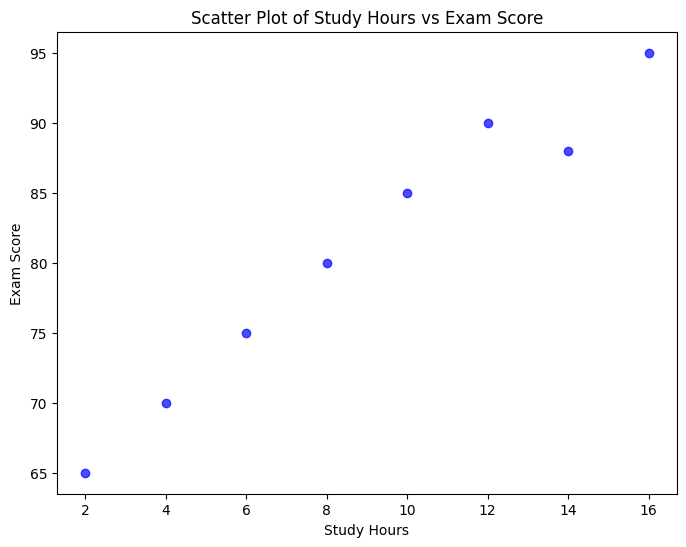

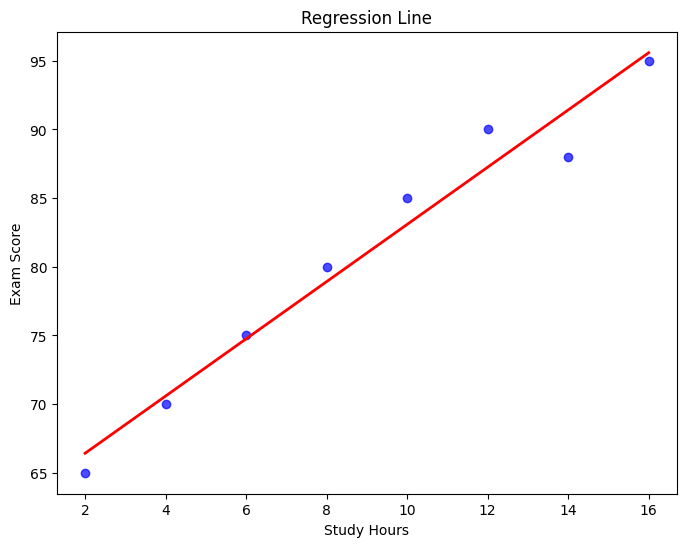

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
data = {
    'Study_Hours': [2, 4, 6, 8, 10, 12, 14, 16],
    'Exam_Score': [65, 70, 75, 80, 85, 90, 88, 95]
}
df = pd.DataFrame(data)
X = df[['Study_Hours']]  # Features (must be 2D for sklearn)
y = df['Exam_Score']     # Target variable
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.7)
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.title('Scatter Plot of Study Hours vs Exam Score')
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.7)
plt.plot(X, y_pred, color='red', linewidth=2)
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.title('Regression Line')
plt.show()



## Step 3: Sum of Squares Calculations

### Total Sum of Squares (SST)
```
SST = Σ(y-ȳ)² = 756
```

### Regression Sum of Squares (SSR)
```
SSR = Σ(ŷ-ȳ)²
```

First, calculate predicted values (ŷ):

| X | Y | ŷ = 62.25 + 2.083x | ŷ-ȳ | (ŷ-ȳ)² |
|---|---|-------------------|------|--------|
| 2 | 65 | 66.42 | -14.58 | 212.58 |
| 4 | 70 | 70.58 | -10.42 | 108.58 |
| 6 | 75 | 74.75 | -6.25 | 39.06 |
| 8 | 80 | 78.92 | -2.08 | 4.33 |
| 10 | 85 | 83.08 | 2.08 | 4.33 |
| 12 | 90 | 87.25 | 6.25 | 39.06 |
| 14 | 88 | 91.42 | 10.42 | 108.58 |
| 16 | 95 | 95.58 | 14.58 | 212.58 |
| | | | | **SSR = 729.10** |

### Error Sum of Squares (SSE)
```
SSE = SST - SSR = 756 - 729.10 = 26.90
```

**Verification:** SST = SSR + SSE → 756 = 729.10 + 26.90 ✓

## Step 4: Correlation Coefficient (r)

### Pearson Correlation Coefficient
```
r = Σ(x-x̄)(y-ȳ) / √[Σ(x-x̄)²Σ(y-ȳ)²]
r = 350 / √(168 × 756)
r = 350 / √126,968
r = 350 / 356.33
r = 0.982
```

**Strong positive correlation (r = 0.982)**

## Step 5: Coefficient of Determination (R²)

### R² Calculation
```
R² = SSR/SST = 729.10/756 = 0.964
```

**Alternative calculation:**
```
R² = r² = (0.982)² = 0.964
```

**Interpretation:** 96.4% of the variation in exam scores is explained by study hours.

## Step 6: ANOVA Table

| Source | SS | df | MS | F |
|--------|----|----|----|----|
| Regression | 729.10 | 1 | 729.10 | 162.56 |
| Error | 26.90 | 6 | 4.48 | |
| Total | 756.00 | 7 | | |

### Calculations:
- df(regression) = 1 (one predictor)
- df(error) = n - 2 = 8 - 2 = 6
- df(total) = n - 1 = 8 - 1 = 7
- MS(regression) = SSR/df(regression) = 729.10/1 = 729.10
- MS(error) = SSE/df(error) = 26.90/6 = 4.48
- F-statistic = MS(regression)/MS(error) = 729.10/4.48 = 162.56

### F-Test Interpretation
- F(1,6) = 162.56
- Critical F(1,6) at α = 0.05 ≈ 5.99
- Since F > F_critical, we reject H₀: β₁ = 0
- **Conclusion:** The relationship is statistically significant

## Step 7: Residual Analysis

### Residuals Calculation

| Observation | X | Y | ŷ | Residual (e = y - ŷ) | e² |
|-------------|---|---|---|---------------------|-----|
| 1 | 2 | 65 | 66.42 | -1.42 | 2.02 |
| 2 | 4 | 70 | 70.58 | -0.58 | 0.34 |
| 3 | 6 | 75 | 74.75 | 0.25 | 0.06 |
| 4 | 8 | 80 | 78.92 | 1.08 | 1.17 |
| 5 | 10 | 85 | 83.08 | 1.92 | 3.69 |
| 6 | 12 | 90 | 87.25 | 2.75 | 7.56 |
| 7 | 14 | 88 | 91.42 | -3.42 | 11.70 |
| 8 | 16 | 95 | 95.58 | -0.58 | 0.34 |
| | | | | **Σe = 0** | **Σe² = 26.88** |

### Residual Statistics
- Mean of residuals: 0/8 = 0 ✓
- Standard error: s = √(SSE/(n-2)) = √(26.90/6) = 2.12

## Step 8: Regression Assumptions

### 1. Linearity
**Check:** Plot Y vs X - should show linear relationship
- **Assessment:** The scatterplot shows a strong linear pattern ✓

### 2. Independence
**Check:** Residuals should be independent
- **Assessment:** No apparent pattern in residual sequence ✓

### 3. Homoscedasticity (Constant Variance)
**Check:** Plot residuals vs fitted values
- **Assessment:** Residuals appear randomly scattered around zero ✓

### 4. Normality of Residuals
**Check:** Residuals should be normally distributed

**Standardized Residuals:**

| Observation | Residual | Standardized Residual |
|-------------|----------|----------------------|
| 1 | -1.42 | -0.67 |
| 2 | -0.58 | -0.27 |
| 3 | 0.25 | 0.12 |
| 4 | 1.08 | 0.51 |
| 5 | 1.92 | 0.91 |
| 6 | 2.75 | 1.30 |
| 7 | -3.42 | -1.61 |
| 8 | -0.58 | -0.27 |

**Assessment:** All standardized residuals are within ±2, suggesting normality ✓

### 5. No Outliers
**Check:** Look for influential observations
- **Assessment:** No extreme outliers detected ✓

## Step 9: Model Summary

### Key Results
- **Regression Equation:** ŷ = 62.25 + 2.083x
- **Correlation:** r = 0.982 (very strong positive)
- **R-squared:** R² = 0.964 (96.4% variance explained)
- **F-statistic:** F = 162.56 (p < 0.001)
- **Standard Error:** s = 2.12



In [ ]:
# Print the full summary which includes the ANOVA table
print(f"STATSMODELS SUMMARY:")
print(model_sm.summary())

STATSMODELS SUMMARY:
                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     163.0
Date:                Fri, 18 Jul 2025   Prob (F-statistic):           1.42e-05
Time:                        15:13:30   Log-Likelihood:                -16.192
No. Observations:                   8   AIC:                             36.38
Df Residuals:                       6   BIC:                             36.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          62.2500      1

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=8 observations were given.
  return hypotest_fun_in(*args, **kwds)


### Interpretation
For every additional hour of study, exam scores increase by approximately 2.08 points on average. The model explains 96.4% of the variation in exam scores, indicating an excellent fit. All regression assumptions appear to be satisfied.

### Confidence in Results
The high R² value, significant F-statistic, and satisfied assumptions suggest this is a reliable model for predicting exam scores based on study hours within the observed range (2-16 hours).

## Step 10: Prediction Example

**Question:** What exam score would we predict for a student who studies 11 hours?

**Answer:**
```
ŷ = 62.25 + 2.083(11) = 62.25 + 22.91 = 85.16
```

**Predicted exam score: 85.16**

## Step 11: Python Implementation with sklearn

Here's the complete Python code that replicates all our manual calculations using built-in functions:

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm

# Step 1: Create the dataset
data = {
    'Study_Hours': [2, 4, 6, 8, 10, 12, 14, 16],
    'Exam_Score': [65, 70, 75, 80, 85, 90, 88, 95]
}

df = pd.DataFrame(data)
print("Dataset:")
print(df)

Dataset:
   Study_Hours  Exam_Score
0            2          65
1            4          70
2            6          75
3            8          80
4           10          85
5           12          90
6           14          88
7           16          95


In [ ]:
# Step 2: Prepare data for sklearn
X = df[['Study_Hours']]  # Features (must be 2D for sklearn)
y = df['Exam_Score']     # Target variable

In [ ]:
# Step 3: Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
# Get coefficients
intercept = model.intercept_
slope = model.coef_[0]
print(f"REGRESSION EQUATION:")
print(f"ŷ = {intercept:.2f} + {slope:.3f}x")
print(f"Manual calculation: ŷ = 62.25 + 2.083x")

REGRESSION EQUATION:
ŷ = 62.25 + 2.083x
Manual calculation: ŷ = 62.25 + 2.083x


In [ ]:
# Step 4: Make predictions
y_pred = model.predict(X)

In [ ]:
# Step 5: Calculate basic statistics
n = len(y)
y_mean = np.mean(y)
x_mean = np.mean(X.values.flatten())

In [ ]:
# Step 6: Get ANOVA table and summary using statsmodels
X_sm = sm.add_constant(X)  # Add constant term for intercept
model_sm = sm.OLS(y, X_sm).fit()
#anova_table = sm.stats.anova_lm(model_sm, typ=2)
#print(f"ANOVA TABLE:")
#print(anova_table)


In [ ]:
# Step 7: Calculate correlation coefficient
correlation_matrix = np.corrcoef(X.values.flatten(), y)
r = correlation_matrix[0, 1]
print(f"CORRELATION:")
print(f"r = {r:.3f}")
print(f"Manual calculation: r = 0.982")

CORRELATION:
r = 0.982
Manual calculation: r = 0.982


In [ ]:
# Step 8: Calculate R-squared
r_squared = r2_score(y, y_pred)

print(f"R-SQUARED:")
print(f"R² (sklearn) = {r_squared:.3f}")
print(f"R² (r²) = {r**2:.3f}")
print(f"Interpretation: {r_squared*100:.1f}% of variance explained")

R-SQUARED:
R² (sklearn) = 0.965
R² (r²) = 0.965
Interpretation: 96.5% of variance explained


In [ ]:
# Step 10: Residual Analysis
residuals = y - y_pred
MSE_sm = mean_squared_error(y, y_pred)
std_error = np.sqrt(MSE_sm)  # Use MSE from statsmodels ANOVA
standardized_residuals = residuals / std_error

print(f"RESIDUAL ANALYSIS:")
residual_df = pd.DataFrame({
    'Observation': range(1, n+1),
    'X': X.values.flatten(),
    'Y': y,
    'Y_pred': y_pred,
    'Residual': residuals,
    'Std_Residual': standardized_residuals
})

print(residual_df.round(2))
print(f"\nSum of residuals: {np.sum(residuals):.6f}")
print(f"Standard error: {std_error:.2f}")
print(f"Manual calculation: s = 2.12")

RESIDUAL ANALYSIS:
   Observation   X   Y  Y_pred  Residual  Std_Residual
0            1   2  65   66.42     -1.42         -0.77
1            2   4  70   70.58     -0.58         -0.32
2            3   6  75   74.75      0.25          0.14
3            4   8  80   78.92      1.08          0.59
4            5  10  85   83.08      1.92          1.05
5            6  12  90   87.25      2.75          1.50
6            7  14  88   91.42     -3.42         -1.87
7            8  16  95   95.58     -0.58         -0.32

Sum of residuals: 0.000000
Standard error: 1.83
Manual calculation: s = 2.12


In [ ]:
# Step 13: Make a prediction (same as manual)
new_hours = 11
prediction = model.predict([[new_hours]])[0]
print(f"PREDICTION:")
print(f"For {new_hours} hours of study:")
print(f"Predicted exam score = {prediction:.2f}")
print(f"Manual calculation: 85.16")

PREDICTION:
For 11 hours of study:
Predicted exam score = 85.17
Manual calculation: 85.16


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


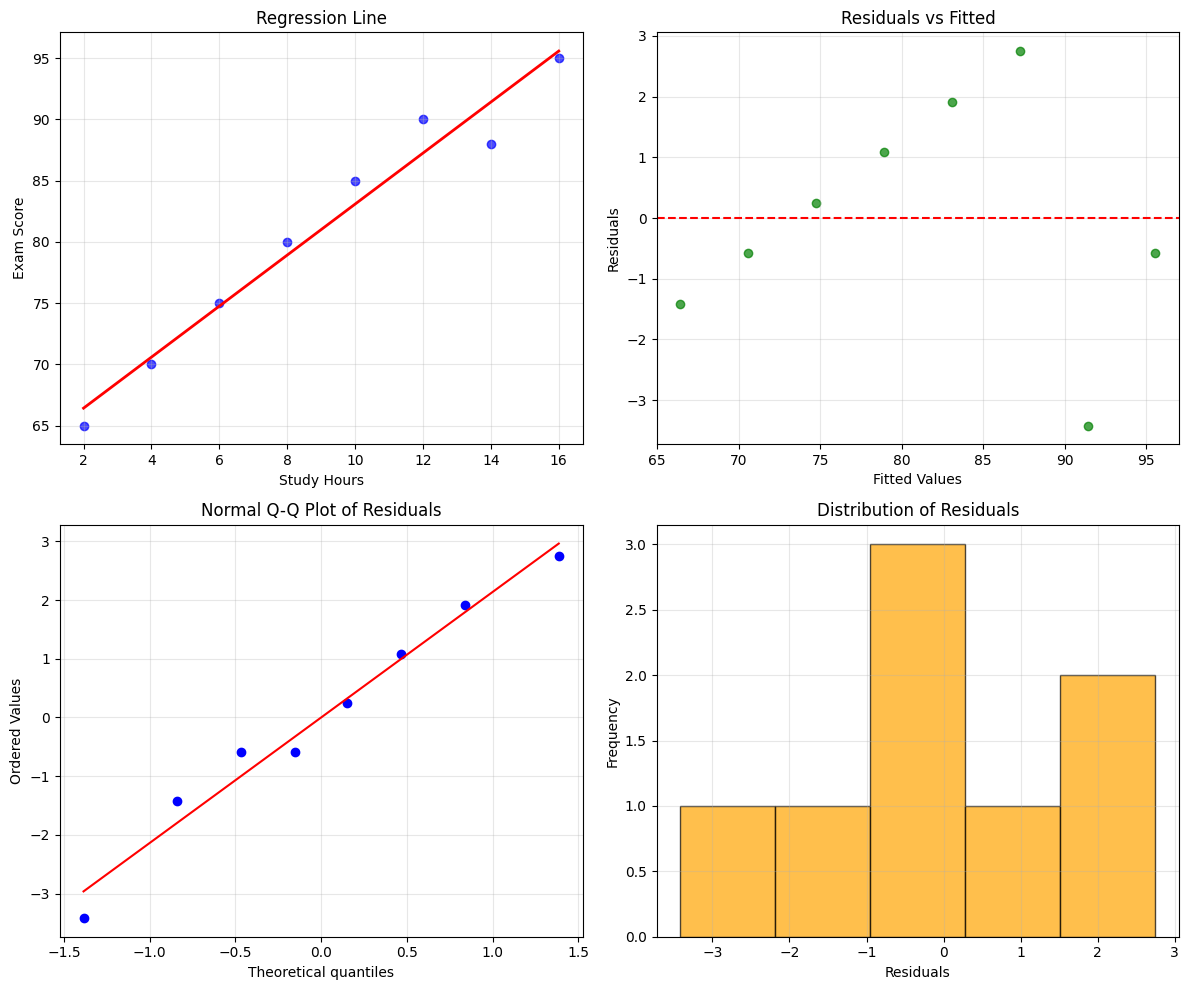

In [ ]:
# Step 14: Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Scatterplot with regression line
axes[0,0].scatter(X, y, color='blue', alpha=0.7)
axes[0,0].plot(X, y_pred, color='red', linewidth=2)
axes[0,0].set_xlabel('Study Hours')
axes[0,0].set_ylabel('Exam Score')
axes[0,0].set_title('Regression Line')
axes[0,0].grid(True, alpha=0.3)

# 2. Residuals vs Fitted
axes[0,1].scatter(y_pred, residuals, color='green', alpha=0.7)
axes[0,1].axhline(y=0, color='red', linestyle='--')
axes[0,1].set_xlabel('Fitted Values')
axes[0,1].set_ylabel('Residuals')
axes[0,1].set_title('Residuals vs Fitted')
axes[0,1].grid(True, alpha=0.3)

# 3. Normal Q-Q plot of residuals
stats.probplot(residuals, dist="norm", plot=axes[1,0])
axes[1,0].set_title('Normal Q-Q Plot of Residuals')
axes[1,0].grid(True, alpha=0.3)

# 4. Histogram of residuals
axes[1,1].hist(residuals, bins=5, color='orange', alpha=0.7, edgecolor='black')
axes[1,1].set_xlabel('Residuals')
axes[1,1].set_ylabel('Frequency')
axes[1,1].set_title('Distribution of Residuals')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()